In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("train_LZdllcl.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


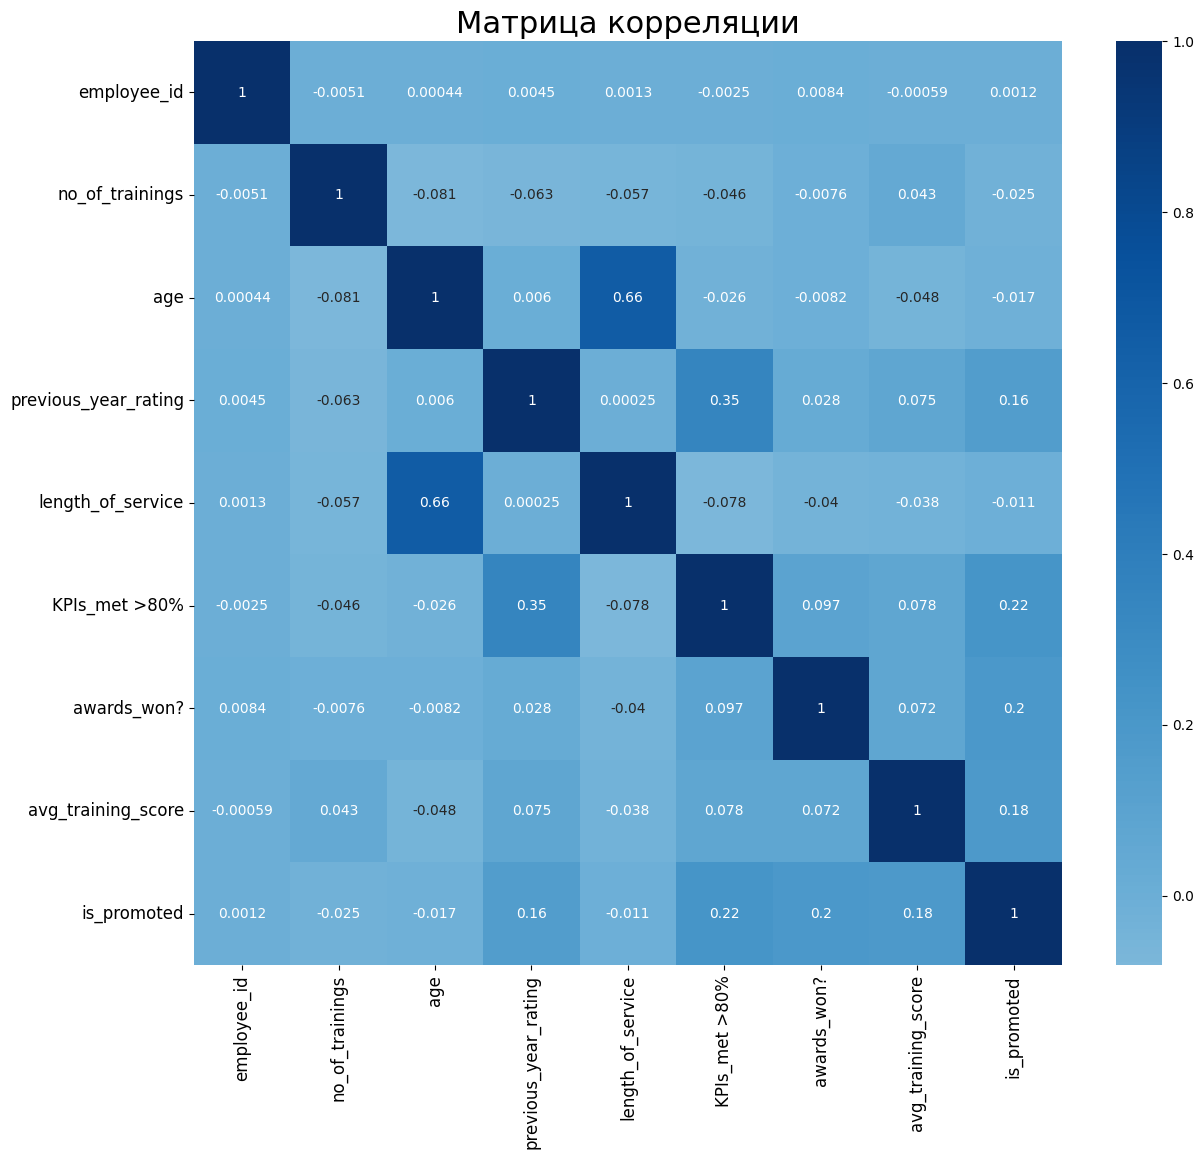

In [2]:
plt.figure(figsize=(14,12))
a = df.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Blues', center=0, annot=True)
plt.title("Матрица корреляции", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [3]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [4]:
df["previous_year_rating"].fillna(0, inplace=True)
df["education"].fillna("0", inplace=True)

<ipython-input-4-567bc050e9ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["previous_year_rating"].fillna(0, inplace=True)
<ipython-input-4-567bc050e9ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [5]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [6]:
# label_encoder1 = preprocessing.LabelEncoder()
# label_encoder1.fit(df["region"])
# df["region"] = label_encoder1.transform(df["region"])

# label_encoder2 = preprocessing.LabelEncoder()
# label_encoder2.fit(df["department"])
# df["department"] = label_encoder2.transform(df["department"])

label_encoder3 = preprocessing.LabelEncoder()
label_encoder3.fit(df["gender"])
df["gender"] = label_encoder3.transform(df["gender"])

df = pd.get_dummies(df, columns=["education"])
df = pd.get_dummies(df, columns=["department"])
df = pd.get_dummies(df, columns=["region"])
df

,employee_id,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,65438,0,sourcing,1,35,5.0,8,1,0,49,...,False,False,False,False,False,False,False,True,False,False
1,65141,1,other,1,30,5.0,4,0,0,60,...,False,False,False,False,False,False,False,False,False,False
2,7513,1,sourcing,1,34,3.0,7,0,0,50,...,False,False,False,False,False,False,False,False,False,False
3,2542,1,other,2,39,1.0,10,0,0,50,...,False,False,False,False,False,False,False,False,False,False
4,48945,1,other,1,45,3.0,2,0,0,73,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,sourcing,1,48,3.0,17,0,0,78,...,False,False,False,False,False,False,False,False,False,False
54804,74592,0,other,1,37,2.0,6,0,0,56,...,False,False,False,False,False,False,False,False,False,False
54805,13918,1,other,1,27,5.0,3,1,0,79,...,False,False,False,False,False,False,False,False,False,False
54806,13614,1,sourcing,1,29,1.0,2,0,0,45,...,False,False,False,False,False,False,False,False,False,True


In [7]:
one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoder.fit(df["recruitment_channel"].values.reshape(-1, 1))
x_new = one_hot_encoder.transform(df["recruitment_channel"].values.reshape(-1, 1)).toarray()
encoded_columns = one_hot_encoder.get_feature_names_out(["recruitment_channel"])
encoded_df = pd.DataFrame(x_new, columns=encoded_columns)
df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=["recruitment_channel"], inplace=True)
df

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,...,False,False,False,False,True,False,False,0.0,0.0,1.0
1,65141,1,1,30,5.0,4,0,0,60,0,...,False,False,False,False,False,False,False,1.0,0.0,0.0
2,7513,1,1,34,3.0,7,0,0,50,0,...,False,False,False,False,False,False,False,0.0,0.0,1.0
3,2542,1,2,39,1.0,10,0,0,50,0,...,False,False,False,False,False,False,False,1.0,0.0,0.0
4,48945,1,1,45,3.0,2,0,0,73,0,...,False,False,False,False,False,False,False,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,1,48,3.0,17,0,0,78,0,...,False,False,False,False,False,False,False,0.0,0.0,1.0
54804,74592,0,1,37,2.0,6,0,0,56,0,...,False,False,False,False,False,False,False,1.0,0.0,0.0
54805,13918,1,1,27,5.0,3,1,0,79,0,...,False,False,False,False,False,False,False,1.0,0.0,0.0
54806,13614,1,1,29,1.0,2,0,0,45,0,...,False,False,False,False,False,False,True,0.0,0.0,1.0


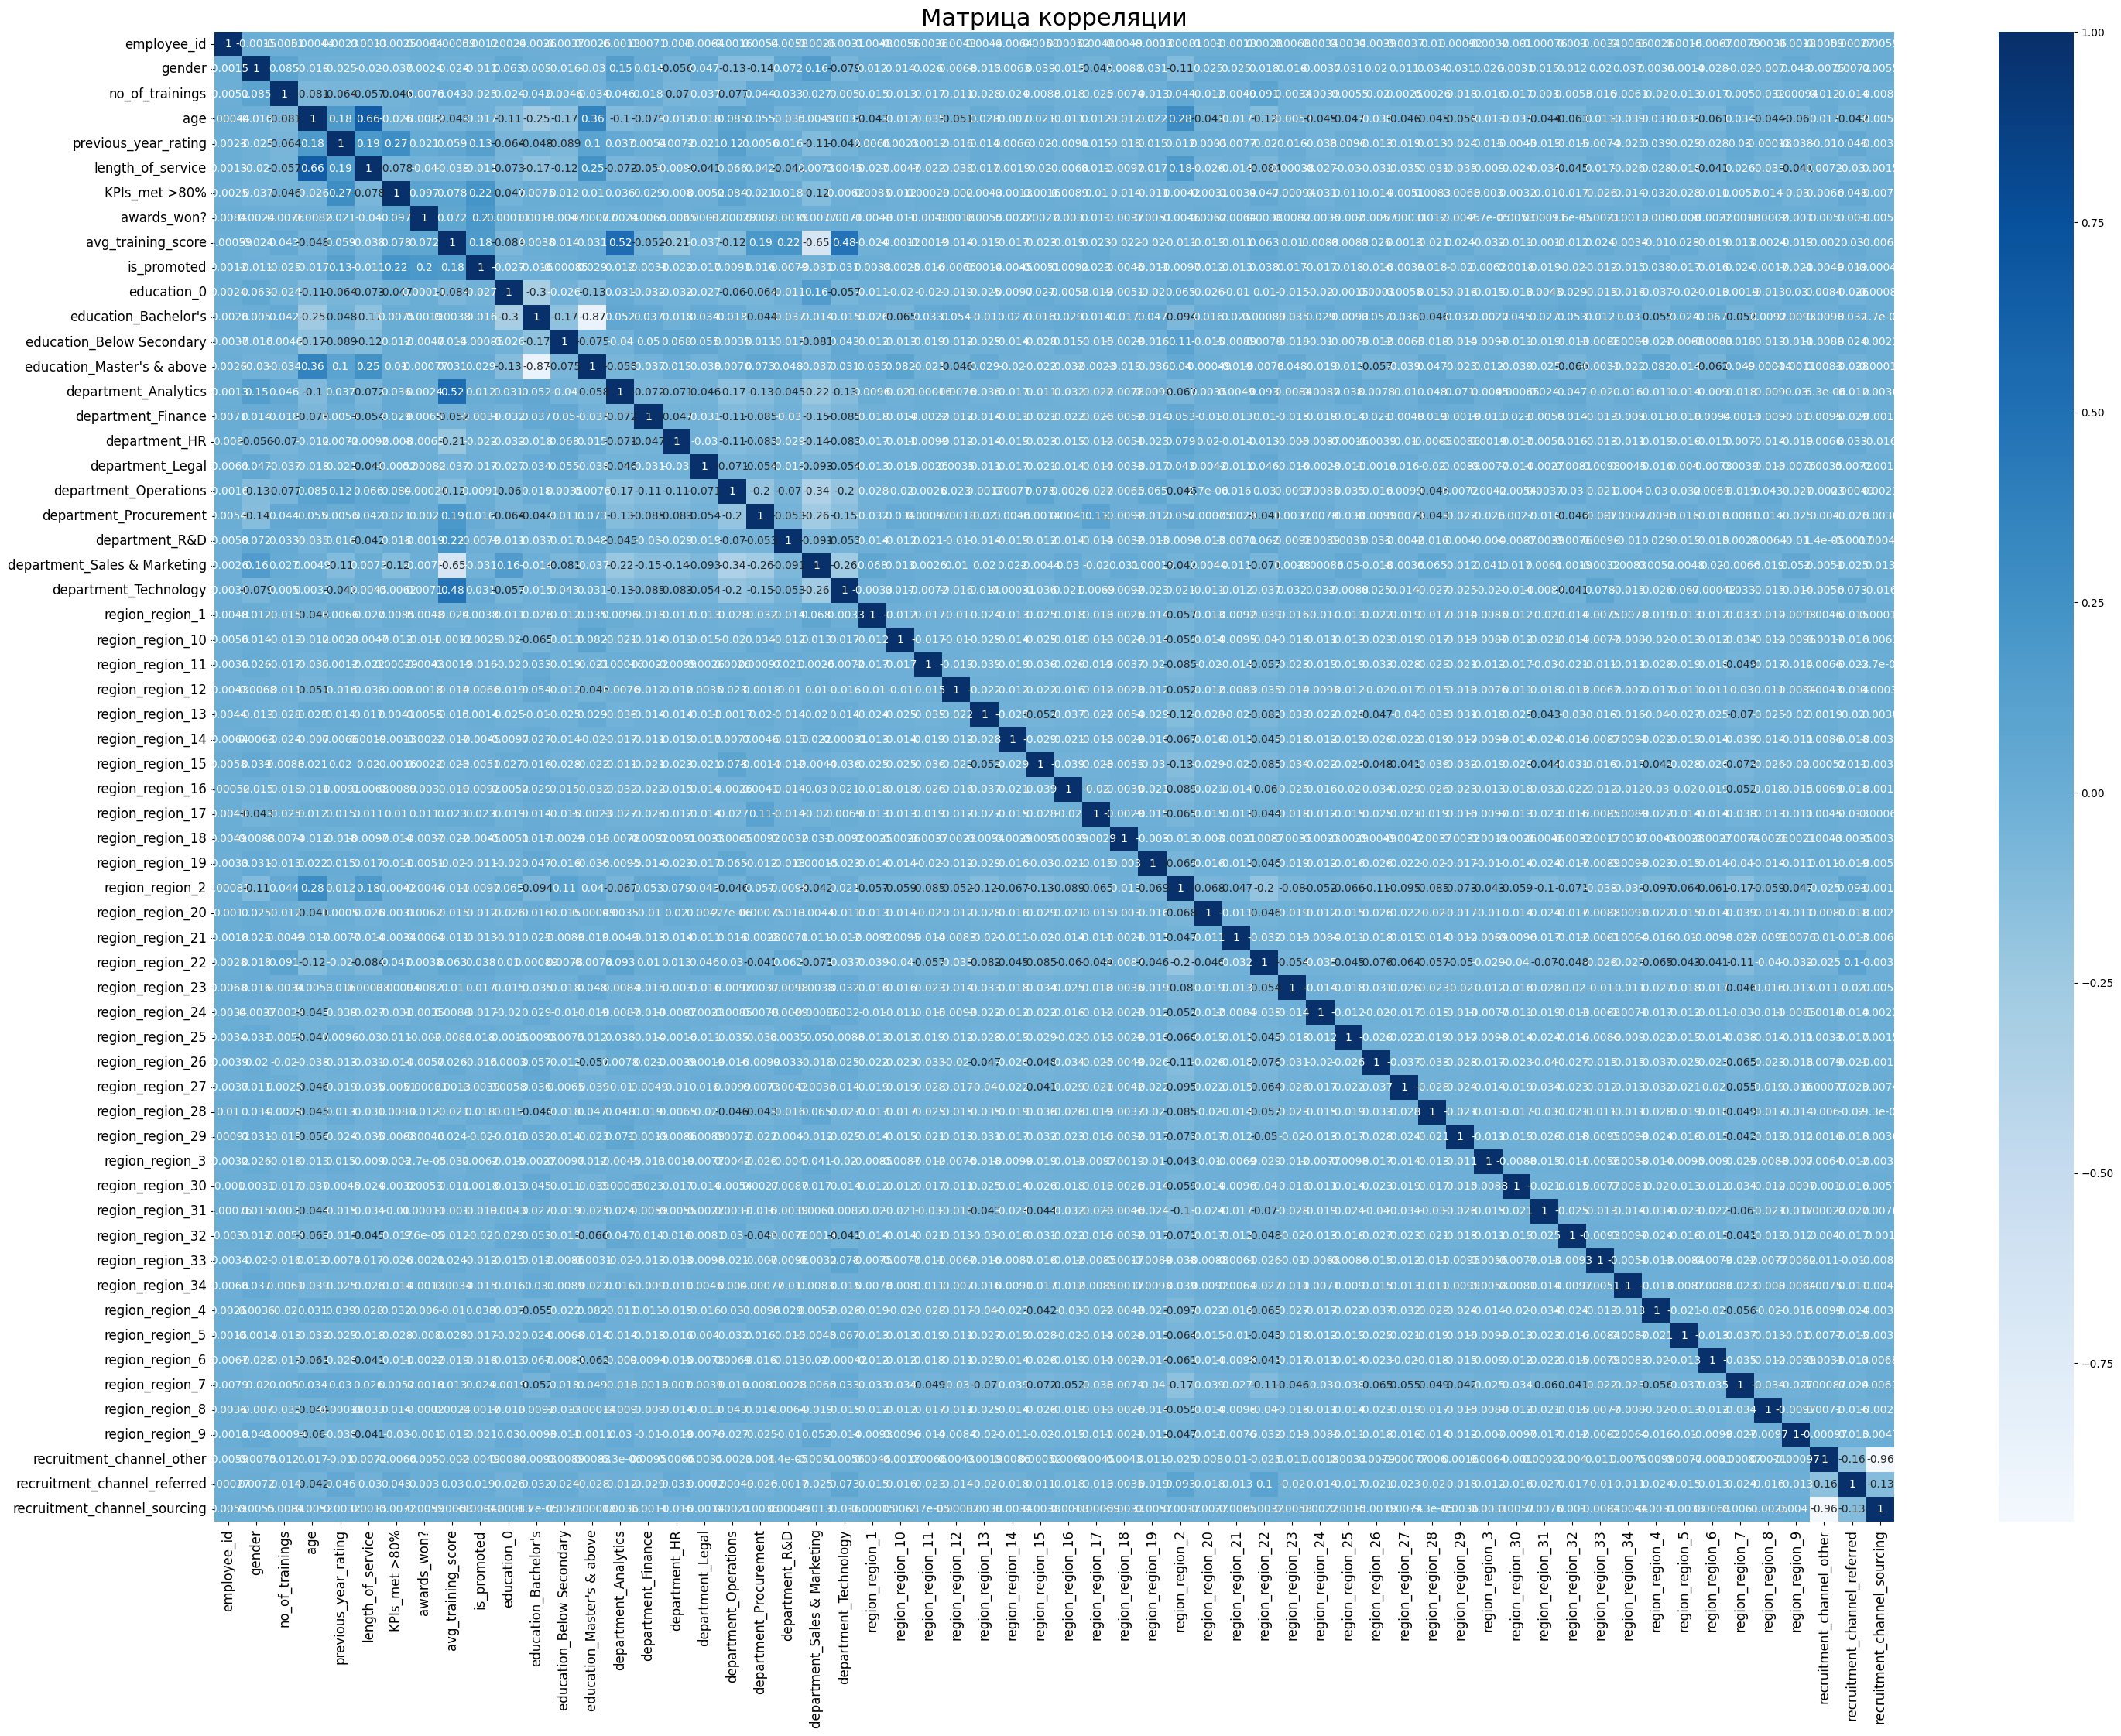

In [20]:
plt.figure(figsize=(35,25))
a = df.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Blues', center=0, annot=True)
plt.title("Матрица корреляции", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
X = pd.concat([df.loc[:, "gender":"avg_training_score"], df.loc[:, "education_0":]], axis=1)
y = df["is_promoted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()

model.fit(X_train, y_train)

answers_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
model.coef_

array([[-3.53332519e-01, -4.20566281e-01, -7.42652859e-02,
         1.35924167e-01,  5.20717626e-02,  1.21323901e+00,
         2.81950479e+00,  9.76273098e-02, -1.49493160e+00,
        -9.51880456e-01, -1.08973649e+00, -7.58147606e-01,
        -1.82252432e+00, -2.52890129e-01, -3.64515580e-01,
        -3.17039787e-01,  4.12538605e-01, -4.24307820e-01,
        -1.31133201e+00,  1.01170083e+00, -1.22632594e+00,
        -1.52458812e-01, -2.34641840e-01, -6.12715893e-01,
        -1.90015454e-01, -3.71890443e-02, -7.68118154e-02,
         6.32261118e-02, -3.55638295e-01,  5.39800923e-01,
        -1.94938871e-03, -1.00225676e-02,  1.26611127e-01,
        -3.52521208e-01, -2.33419690e-01,  1.95732371e-01,
         2.79364071e-01, -3.98193297e-01,  8.31557471e-02,
        -3.65279805e-01, -2.23844537e-01,  2.04514383e-01,
        -6.01151444e-01,  5.54878901e-02, -9.31234941e-02,
        -6.59299712e-01, -4.17549806e-01, -1.78697890e-01,
        -2.57962103e-01,  7.75465347e-01, -4.32750970e-0

In [10]:
model.intercept_

array([-4.3175824])

In [11]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, answers_pred))

0.9244663382594417


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 14949
FP: 116
FN: 1126
TP: 252


In [13]:
recall_score(y_test, answers_pred)

0.18287373004354138

In [14]:
precision_score(y_test, answers_pred)

0.6847826086956522

In [15]:
f1_score(y_test, answers_pred)

0.28865979381443296

In [16]:
df["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668
